# Face Mask Detection

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, MaxPooling2D, Dense, Flatten
%matplotlib inline

## Building Model

In [8]:
# Building model
classifier = Sequential()

classifier.add(Convolution2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)))
classifier.add(MaxPooling2D(2,2))

classifier.add(Convolution2D(100, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Flatten())
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation='relu'))
classifier.add(Dense(2, activation='softmax'))

In [9]:
# Model Summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 129600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

In [3]:
# Compiling the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Image Augmentation

In [2]:
# Loading data and Image Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('face-mask-dataset/train', 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('face-mask-dataset/test', 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


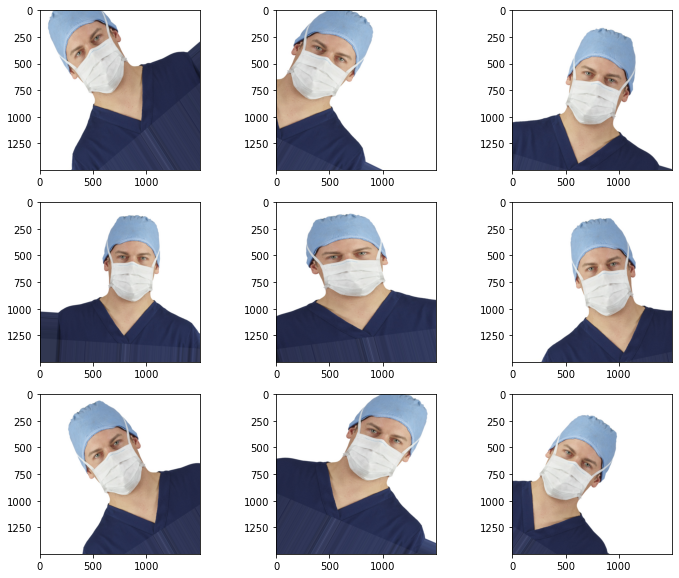

In [13]:
# Sample of Image Augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load the image
img = load_img('face-mask-dataset/train/with_mask/a.jpg')
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
# Prepare iterator
it = datagen.flow(samples, batch_size=1)
plt.figure(figsize=(12,10))
# Generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # Generate batch of images
 batch = it.next()
 # Convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # Plot raw pixel data
 plt.imshow(image)
# Show the figure
plt.show()

In [5]:
# Model Checkpointing
from keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

## Training Model

In [6]:
# Training Model
history = classifier.fit_generator(train_generator,
                                   epochs=10,
                                   validation_data=validation_generator,
                                   callbacks=[checkpoint],)

Epoch 1/10
132/132 [==============================] - 11s 83ms/step - loss: 0.6317 - accuracy: 0.7603 - val_loss: 0.2153 - val_accuracy: 0.9227
Epoch 2/10
132/132 [==============================] - 9s 71ms/step - loss: 0.3076 - accuracy: 0.8714 - val_loss: 0.0250 - val_accuracy: 0.9588
Epoch 3/10
132/132 [==============================] - 9s 72ms/step - loss: 0.2867 - accuracy: 0.8950 - val_loss: 0.0818 - val_accuracy: 0.9639
Epoch 4/10
132/132 [==============================] - 9s 71ms/step - loss: 0.2776 - accuracy: 0.8904 - val_loss: 0.1542 - val_accuracy: 0.9588
Epoch 5/10
132/132 [==============================] - 9s 71ms/step - loss: 0.2643 - accuracy: 0.9064 - val_loss: 0.0097 - val_accuracy: 0.9742
Epoch 6/10
132/132 [==============================] - 9s 72ms/step - loss: 0.3064 - accuracy: 0.8858 - val_loss: 0.3677 - val_accuracy: 0.8969
Epoch 7/10
132/132 [==============================] - 9s 71ms/step - loss: 0.2233 - accuracy: 0.9163 - val_loss: 0.0550 - val_accuracy: 0.958

## Performance Curves

Text(0.5, 1.0, 'Accuracy Curve')

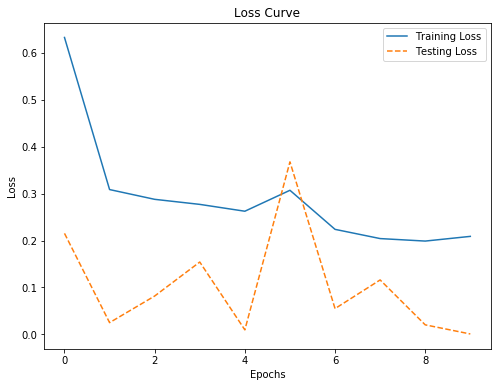

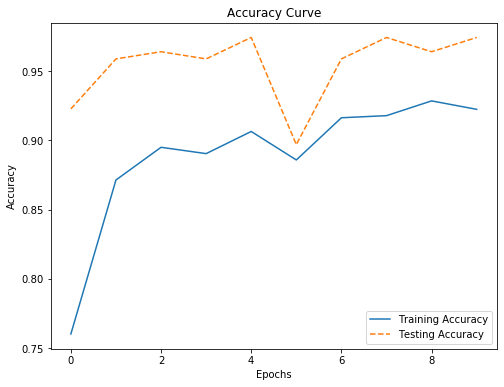

In [7]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")